# StratThink_HDipData_CA_2023

### Students: 

#### Otáwio 2022200

#### Ruben, 

#### Barbara, 

#### Katia, 

#### Eliene.

### Lecturer:  James Garza

### Module:  Strategic Thinking

# 

# Business understanding

The implementation of data preparation and machine learning (ML) techniques will be the way to determine which of these objects are hazardous  and which are not. The knowledge discovery process (KDD - Knowledge Discovery in Databases) was created using the CRISP-DM (CRoss Industry Standard Process for Data Mining) methodology (Chapman et al., 2000). Thus, domain understanding, data understanding, data preparation, modeling, evaluation, and distribution are the six phases that make up a project's life cycle.

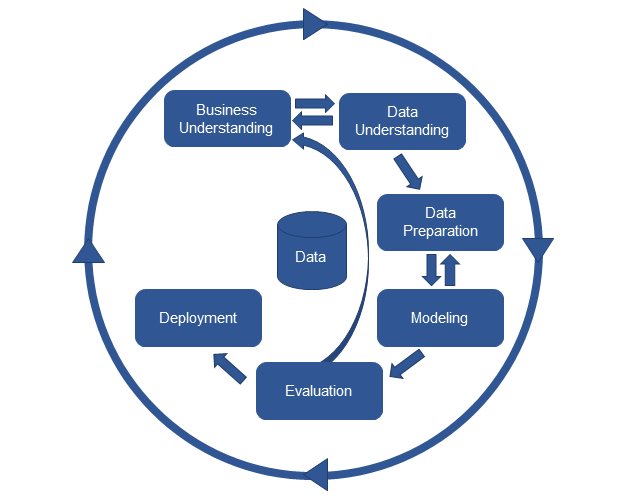

### NASA - Nearest Earth Objects

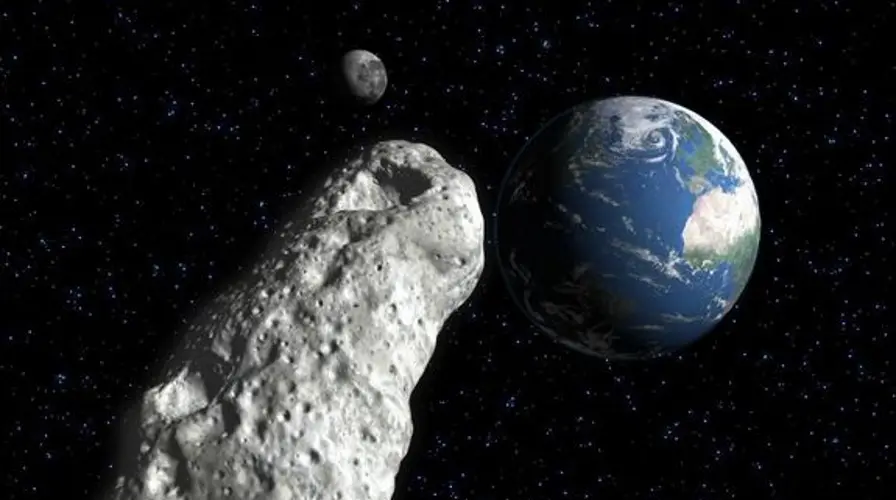

https://jpl.nasa.gov, n.d

# 

 ## Libraries

In [1]:
# Import warnings.
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package.
import numpy as np
import pandas as pd

# Import sklearn preprocessing.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# Import imblearn SMOTEENN.
from imblearn.combine import SMOTEENN
from collections import Counter

# Import train_test_split function.
from sklearn.model_selection import train_test_split

# Import time.
import time

# Import math.
import math

# Scipy package.
from scipy import sparse

# Import cross-validation libraries.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Import sklearn model selection.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import machine learning Classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Import sklearn.metrics. 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score

# Import the mglearn package.
import mglearn

# Import data visualisation package.
from yellowbrick.classifier import ClassificationReport
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# Setting data visualisation style.
sns.set_palette("bright")
sns.set_style('whitegrid')
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

Libraries (description and usefulness of the main libraries used in the project)

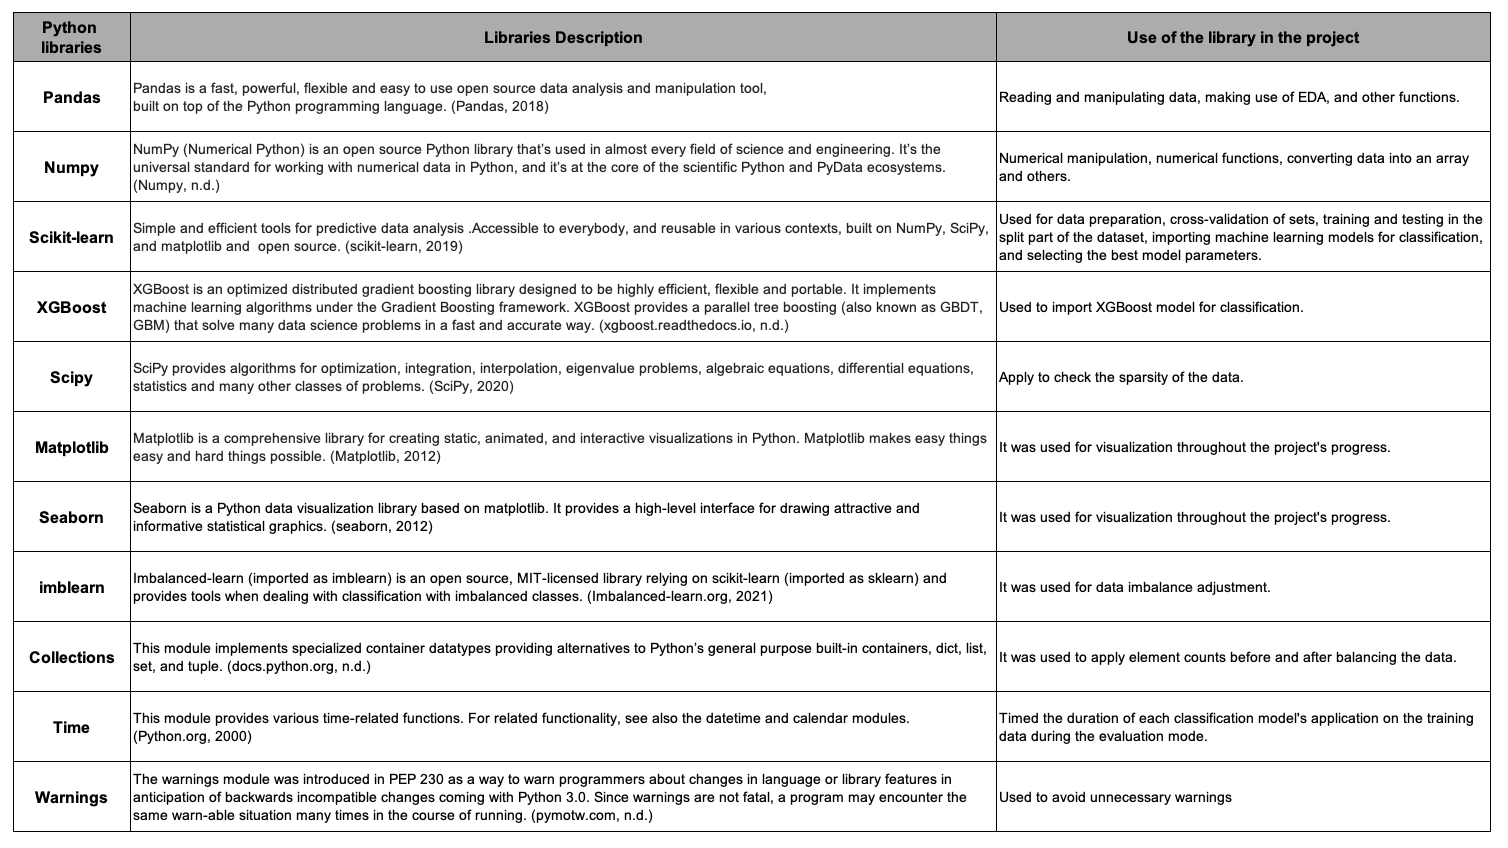

# 

## Data Dictionary 

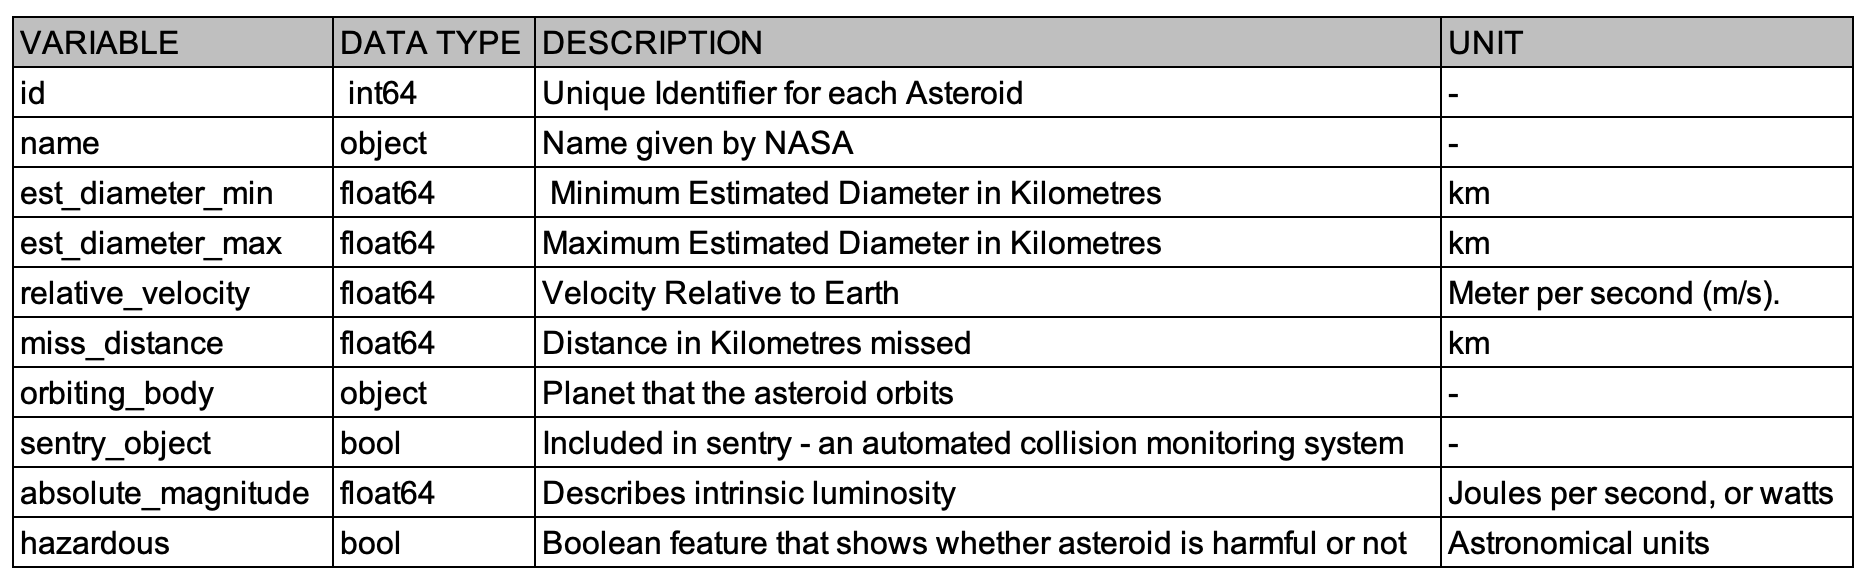

https://jpl.nasa.gov (n.d.)

# 

# Data Understanding

## Exploratory Data Analysis (EDA)

In [2]:
# Checking missing value formats and read data file.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df = pd.read_csv("neo.csv", na_values=missing_value_formats)

# Checking for any missing values.
if df.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Display first and last 5 records.
display(df.head())
display(df.tail())

# Display shape and info.
print("Shape of the dataset:", df.shape)
print("\nInformation about the dataset:\n")
df.info()

No missing values.


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


Shape of the dataset: (90836, 10)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [3]:
# Checking if dataset has duplicate rows.
print("Duplicated rows before: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicated rows after: ", df.duplicated().sum())

Duplicated rows before:  0
Duplicated rows after:  0


In [4]:
# Printing columns to copy and paste
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


In [5]:
# Rename the columns.
df = df.rename(columns={
    'id': 'Asteroid ID',
    'name': 'Asteroid Name',
    'est_diameter_min': 'Estimated Diameter (Min)',
    'est_diameter_max': 'Estimated Diameter (Max)',
    'relative_velocity': 'Relative Velocity (km/s)',
    'miss_distance': 'Miss Distance (km)',
    'orbiting_body': 'Orbiting Body',
    'sentry_object': 'Sentry Object',
    'absolute_magnitude': 'Absolute Magnitude',
    'hazardous': 'Potentially Hazardous'
})
print(df.columns)

Index(['Asteroid ID', 'Asteroid Name', 'Estimated Diameter (Min)',
       'Estimated Diameter (Max)', 'Relative Velocity (km/s)',
       'Miss Distance (km)', 'Orbiting Body', 'Sentry Object',
       'Absolute Magnitude', 'Potentially Hazardous'],
      dtype='object')


# 

### Checking for missing values 

The info( ) function had already shown that the data set had no missing values, but the isnull( ) function can be used as a backup to make sure there weren't any.

In [6]:
# Check for null values and calculate the percentage of null values.
null_df = df.isnull().sum().sort_values().apply(lambda x: '{:.2%}'.format(x / len(df))) \
           .to_frame(name='Null Percentage').rename_axis('Column Name').reset_index()

# Print the null value information.
print("Null values per column:")
print(null_df)

Null values per column:
                Column Name Null Percentage
0               Asteroid ID           0.00%
1             Asteroid Name           0.00%
2  Estimated Diameter (Min)           0.00%
3  Estimated Diameter (Max)           0.00%
4  Relative Velocity (km/s)           0.00%
5        Miss Distance (km)           0.00%
6             Orbiting Body           0.00%
7             Sentry Object           0.00%
8        Absolute Magnitude           0.00%
9     Potentially Hazardous           0.00%


 # 

### Descriptive Statistics 

In [7]:
# Applying the describe() to view some statistical information.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Asteroid ID,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
Estimated Diameter (Min),90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
Estimated Diameter (Max),90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
Relative Velocity (km/s),90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
Miss Distance (km),90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
Absolute Magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


In [8]:
# Applying the describe() to view some statistical information.
df.describe(include='object').T

,count,unique,top,freq
Asteroid Name,90836,27423,469219 Kamo`oalewa (2016 HO3),43
Orbiting Body,90836,1,Earth,90836


In [9]:
# Applying the describe() to view some statistical information.
df.describe(include='bool')

,Sentry Object,Potentially Hazardous
count,90836,90836
unique,1,2
top,False,False
freq,90836,81996


# 

### Index Setting

In [10]:
# Set the "ID" as the index.
df = df.set_index('Asteroid ID')

# Display first and last 5 records.
display(df.head())
display(df.tail())

,Asteroid Name,Estimated Diameter (Min),Estimated Diameter (Max),Relative Velocity (km/s),Miss Distance (km),Orbiting Body,Sentry Object,Absolute Magnitude,Potentially Hazardous
Asteroid ID,,,,,,,,,
2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


,Asteroid Name,Estimated Diameter (Min),Estimated Diameter (Max),Relative Velocity (km/s),Miss Distance (km),Orbiting Body,Sentry Object,Absolute Magnitude,Potentially Hazardous
Asteroid ID,,,,,,,,,
3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


### Data Visualization

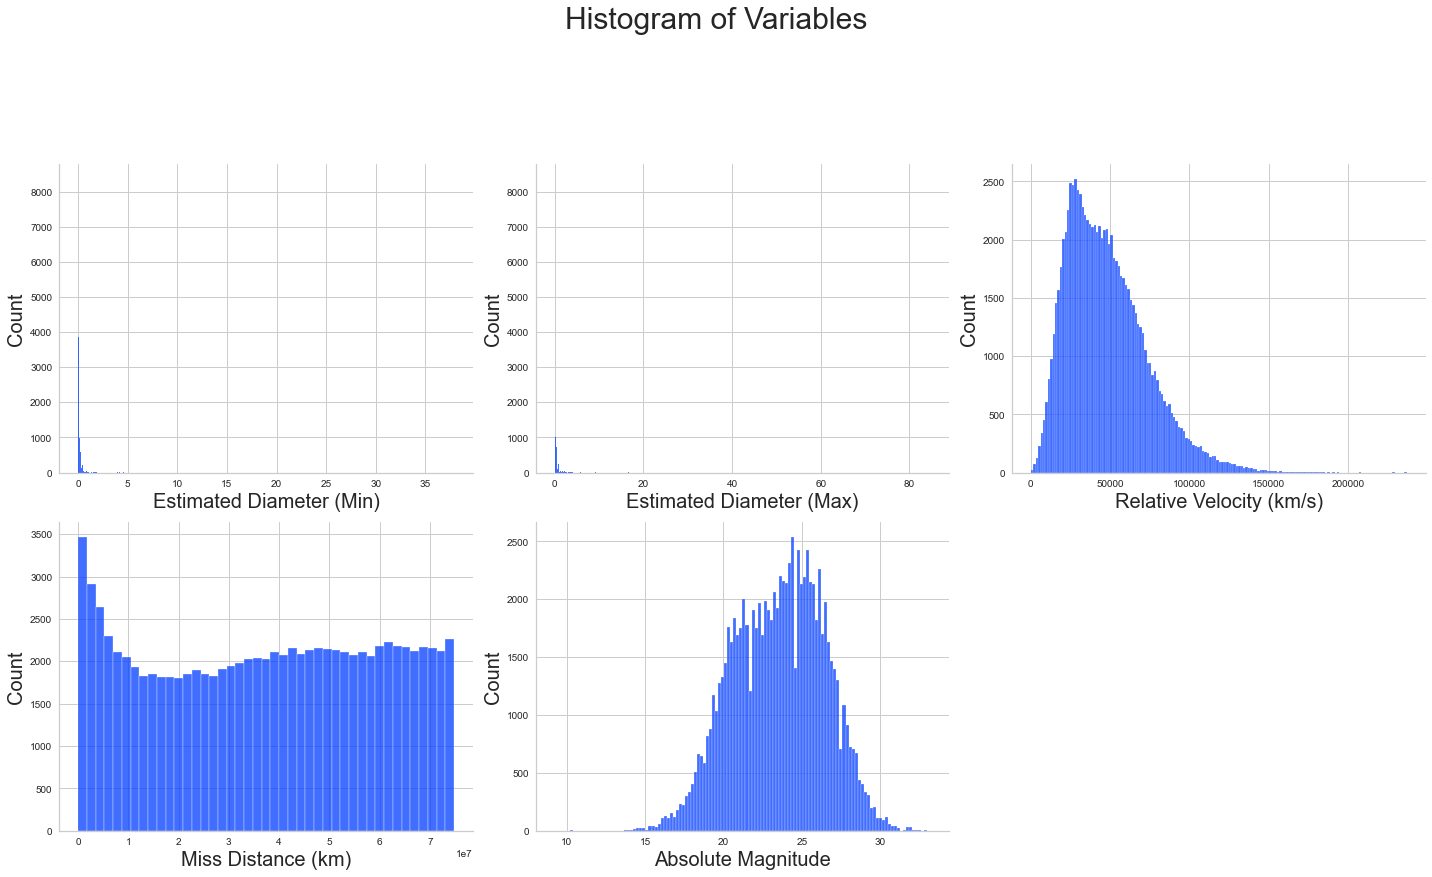

In [11]:
# Select variables for the histogram plot.
variables = ['Estimated Diameter (Min)','Estimated Diameter (Max)', 'Relative Velocity (km/s)','Miss Distance (km)','Absolute Magnitude']

# Create figure.
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axs = axs.flatten() # Flatten axes.
plt.suptitle('Histogram of Variables', fontsize=30, y=1.05) #Title

# Loop variables and plot histogram.
for i, var in enumerate(variables):
    sns.histplot(df[var].dropna(), ax=axs[i], kde=False)
    axs[i].set_xlabel(var, fontsize=20)
    axs[i].set_ylabel('Count', fontsize=20)
    sns.despine()

# Check if there are any remaining axes and remove them.
if i < len(axs) - 1:
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

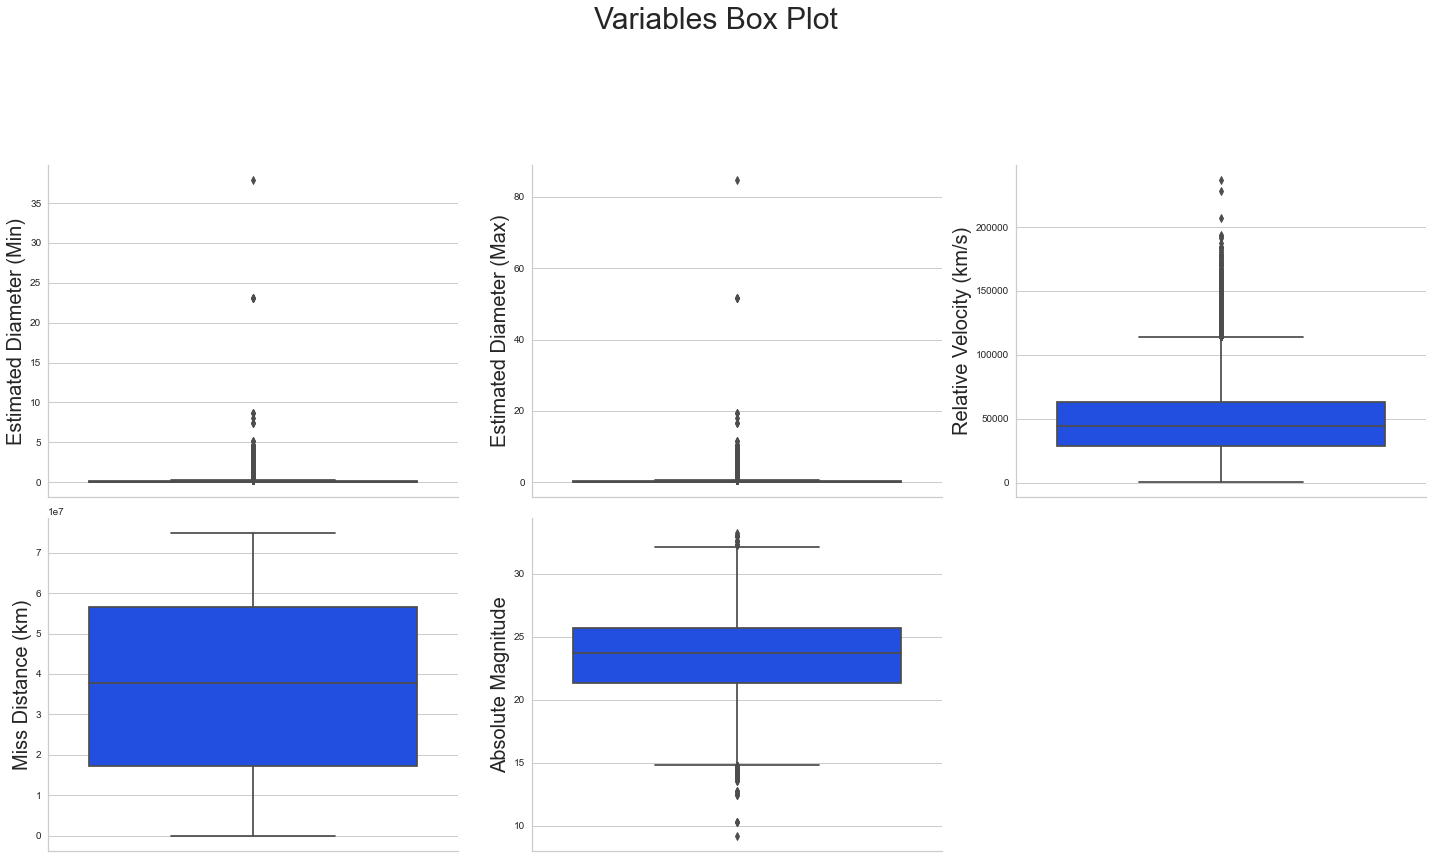

In [12]:
# Creating figure to the plot boxplots.
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axs = axs.flatten() # Flatten axes.
plt.suptitle('Variables Box Plot', fontsize=30, y=1.05) #Title.

# Loop variables and plot boxplots.
for i, var in enumerate(variables):
    sns.boxplot(y=df[var].dropna(), ax=axs[i])
    axs[i].set_ylabel(var, fontsize=20)
    sns.despine()
    
# Checking if there are any axes and remove them.
if i < len(axs) - 1:
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

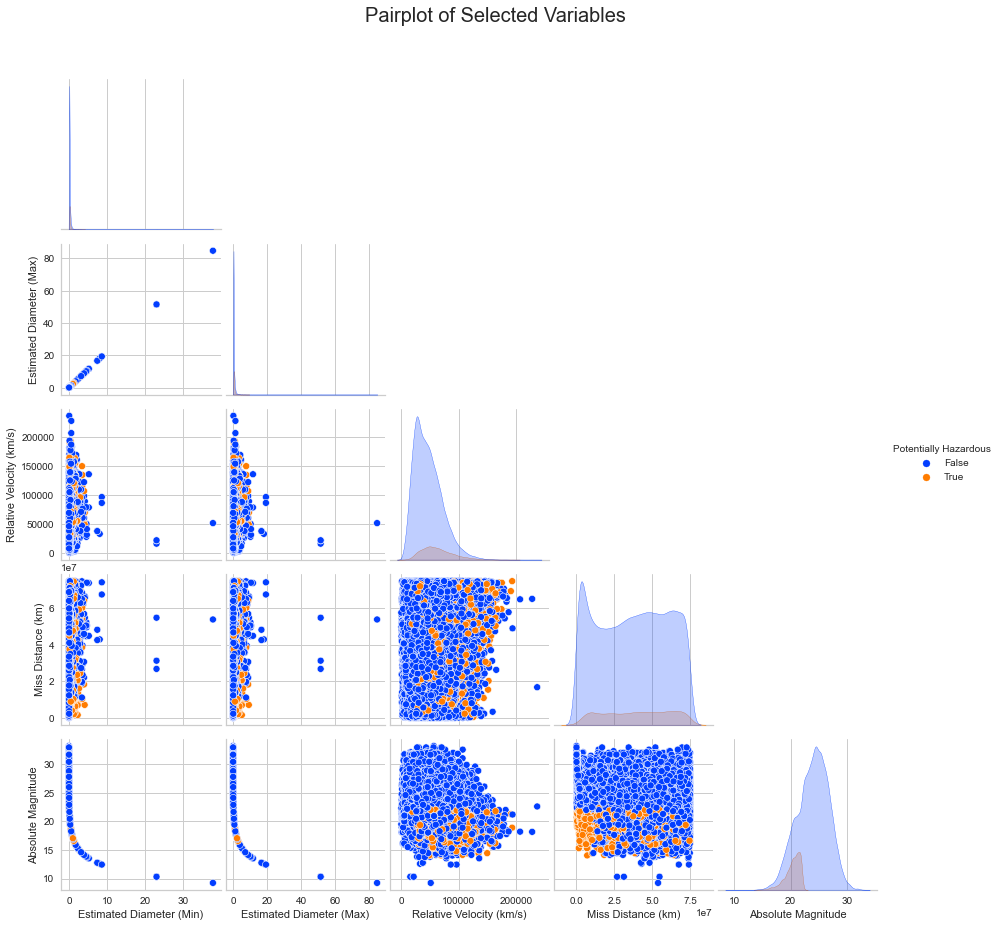

In [13]:
# Select variables for the pairplot.
variables = ["Potentially Hazardous",'Estimated Diameter (Min)', 'Estimated Diameter (Max)', 'Relative Velocity (km/s)', 'Miss Distance (km)', 'Absolute Magnitude']
df_selected = df[variables]

# Create pairplot with selected variables
g = sns.pairplot(df_selected.dropna(), hue="Potentially Hazardous", corner=True)
g.fig.suptitle('Pairplot of Selected Variables', fontsize=20, y=1.03) #Title.
plt.subplots_adjust(top=0.95) # Adjust spacing between plots.
plt.show()

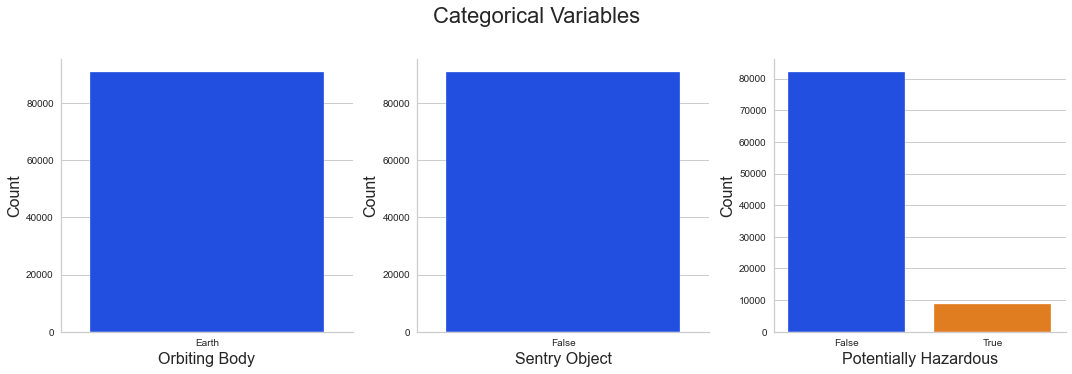

In [14]:
# Select the categorical variables
cat_vars = ['Orbiting Body', 'Sentry Object', 'Potentially Hazardous']
fig, axs = plt.subplots(nrows=1, ncols=len(cat_vars), figsize=(15,5))
fig.suptitle('Categorical Variables', fontsize=22, y=1.03) #Title.

# Loop through each categorical variable and create a count plot.
for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, ax=axs[i])  # Create count plot.
    axs[i].set_xlabel((var), fontsize=16)  # Set x-axis label
    axs[i].set_ylabel('Count',fontsize=16)  # Set y-axis label
    sns.despine()

plt.tight_layout()
plt.show()

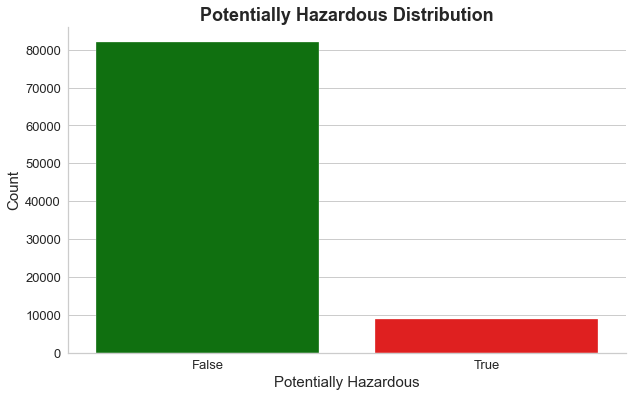

Number of Potentially Hazardous: 8840 (9.73%)
Number of no Potentially Hazardous: 81996 (90.27%)


In [15]:
# Create a count plot of "Potentially Hazardous".
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Potentially Hazardous", palette={0: "green", 1: "red"})
plt.title("Potentially Hazardous Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Potentially Hazardous", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.show()

# Print the number of positive and negative classes
total_count = df.shape[0]
ph_count = df["Potentially Hazardous"].value_counts()[1]
non_ph_count = df["Potentially Hazardous"].value_counts()[0]
print(f"Number of Potentially Hazardous: {ph_count} ({ph_count/total_count*100:.2f}%)")
print(f"Number of no Potentially Hazardous: {non_ph_count} ({non_ph_count/total_count*100:.2f}%)")


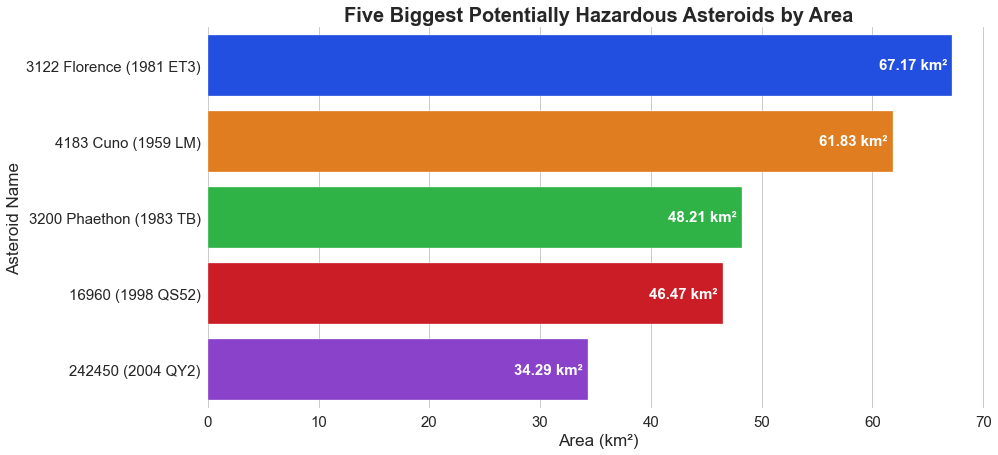

In [16]:
# Potentially Hazardous = 1
df_hazardous = df[df['Potentially Hazardous'] == 1]

# Estimated Diameter (Max) in descending order
df_biggers = df_hazardous.sort_values(by='Estimated Diameter (Max)', ascending=False)

# Create a new column with the diameter values in meters and and a new column with area values in square meters.
df_biggers['Diameter (km)'] = df_biggers['Estimated Diameter (Max)']
df_biggers['Area (km²)'] = (math.pi * ((df_biggers['Diameter (km)'] / 2) ** 2))
df_biggers = df_biggers[['Asteroid Name', 'Estimated Diameter (Max)','Diameter (km)', 'Area (km²)']] # Select only the relevant.

# Seleciona as cinco maiores áreas.
df_biggers = df_biggers.sort_values(by='Area (km²)', ascending=False).head(18)

# Define graph width and height.
WIDTH = 1400
HEIGHT = 700

# Generate a barplot.
ax = sns.barplot(x='Area (km²)', y='Asteroid Name', data=df_biggers, orient='h', palette='bright')
ax.set_title('Five Biggest Potentially Hazardous Asteroids by Area', fontsize=20, fontweight='bold', ha='center') # Title.
ax.figure.set_size_inches(WIDTH/100, HEIGHT/100) # Set the width and height.
sns.despine(left=True, bottom=True) # Remove the spines.
ax.set_xlabel('Area (km²)', fontsize=17)
ax.set_ylabel('Asteroid Name', fontsize=17)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=15)

# Add the area value inside the bar.
for patch in ax.patches:
    area = patch.get_width()
    ax.annotate('{:.2f} km²'.format(area), xy=(patch.get_x() + patch.get_width(), patch.get_y() + patch.get_height() / 2),
        xytext=(-5, 0), textcoords="offset points", # Annotation positions.
        ha='right', va='center', fontsize=15, fontweight='bold', color='white')

plt.show()

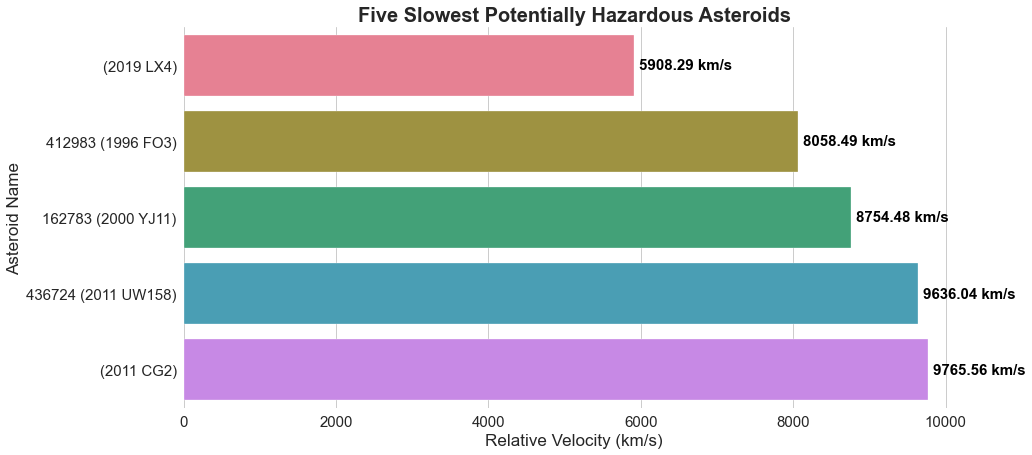

In [17]:
# Potentially Hazardous = 1
df_hazardous = df[df['Potentially Hazardous'] == 1]

# Relative Velocity (km/s) in ascending order
df_velocity = df_hazardous.sort_values(by='Relative Velocity (km/s)', ascending=True)

# Define graph width and height.
WIDTH = 1400
HEIGHT = 700

# Generate a barplot.
ax = sns.barplot(x='Relative Velocity (km/s)', y='Asteroid Name', data=df_velocity.head(5), orient='h', palette='husl')
ax.set_title('Five Slowest Potentially Hazardous Asteroids', fontsize=20, fontweight='bold', ha='center') # Title.
ax.figure.set_size_inches(WIDTH/100, HEIGHT/100) # Set the width and height.
sns.despine(left=True, bottom=True) # Remove the spines.
ax.set_xlabel('Relative Velocity (km/s)', fontsize=17)
ax.set_ylabel('Asteroid Name', fontsize=17)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=15)

# Add the velocity value inside the bar.
for patch in ax.patches:
    velocity = patch.get_width()
    ax.annotate('{:.2f} km/s'.format(velocity), xy=(patch.get_x() + patch.get_width(), patch.get_y() + patch.get_height() / 2),
        xytext=(5, 0), textcoords="offset points", # Annotation positions.
        ha='left', va='center', fontsize=15, fontweight='bold', color='black')

plt.show()

# 

# Data preparation

### Removing unnecessary columns

In [18]:
# Removing categorical variables from the dataset.
df = df.drop(['Asteroid Name','Orbiting Body', 'Sentry Object'], axis = 1)

# 

### Checking the dependent variable and Encoder

In [19]:
# Creating a LabelEncoder object.
lab = LabelEncoder()

# Encoding the 'hazardous' variable using LabelEncoder.
df['Potentially Hazardous'] = lab.fit_transform(df['Potentially Hazardous'])
print("Unique values in the 'Potentially Hazardous' column:")
print(df['Potentially Hazardous'].unique())

Unique values in the 'Potentially Hazardous' column:
[0 1]


# 

### Checking the sparsity

In [20]:
def sparsity_density(df):
    non_zero = np.count_nonzero(df)
    total_val = np.product(df.shape)
    sparsity = (total_val - non_zero) / total_val
    density = non_zero / total_val
    
    print("Density:  ", round(density, 4))
    print("Sparsity: ", round(sparsity, 4))

# Calculating the percentage with the function.
sparsity_density(df) # Confirming if data is sparse.

# Checking if the data is sparse.
if sparse.issparse(df):
    print("This dataframe is sparse.")
else:
    print("This dataframe is not sparse.")

Density:   0.8496
Sparsity:  0.1504
This dataframe is not sparse.


# 

### Spliting the dataset into independent and dependent variables

In [21]:
# Spliting the dataset into independent and dependent variables.
X = df.drop(["Potentially Hazardous"], axis = 1) # Independent variables
y = df["Potentially Hazardous"]                  # Dependent variables.

# 

### Checking Outliers

In [22]:
def count_outliers(df):
    # Calculate the interquartile range (IQR).
    q1 = df.drop(["Potentially Hazardous"], axis = 1).quantile(0.25)
    q3 = df.drop(["Potentially Hazardous"], axis = 1).quantile(0.75)
    iqr = q3 - q1
    
    # Define the threshold for outliers.
    threshold = 1.5 * iqr
    
    # Count the number of outliers for each variable.
    outliers = pd.DataFrame()
    for col in df.drop(["Potentially Hazardous"], axis = 1).columns:
        lower = q1[col] - threshold[col]
        upper = q3[col] + threshold[col]
        count = len(df[(df[col] < lower) | (df[col] > upper)])
        percentage = round(100 * count / len(df), 2)
        outliers[col] = [count, percentage]
    
    # Sort the DataFrame by ascending outlier count.
    outliers = outliers.T.sort_values(by=0)
    outliers.columns = ['Outliers', 'Percentage']
    
    return outliers

In [23]:
outliers = count_outliers(df)
print(outliers)

                          Outliers  Percentage
Miss Distance (km)             0.0        0.00
Absolute Magnitude           101.0        0.11
Relative Velocity (km/s)    1574.0        1.73
Estimated Diameter (Min)    8306.0        9.14
Estimated Diameter (Max)    8306.0        9.14


# 

### Correlation 

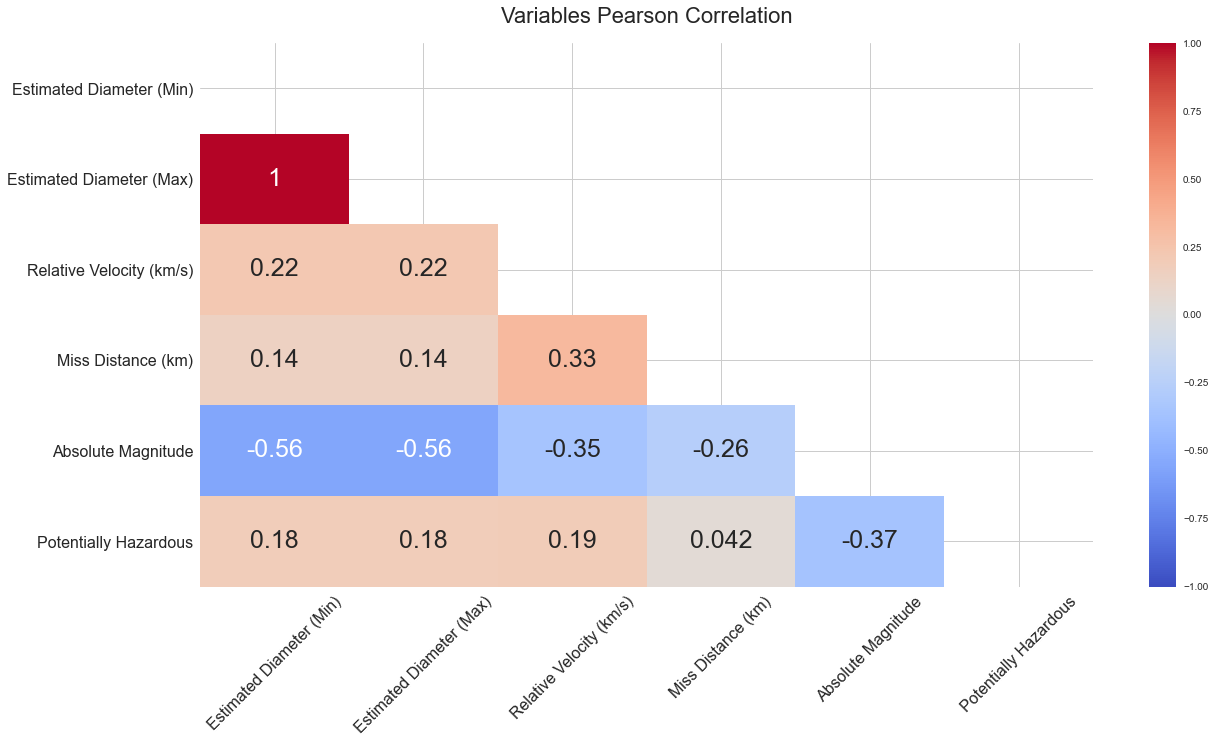

In [24]:
# Correlation of numerical variables
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df.corr(method="pearson"), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={"fontsize":25})
heatmap.set_title('Variables Pearson Correlation', fontdict={'fontsize':22}, pad=20)
plt.xticks(rotation=45,fontsize=16)
plt.yticks(rotation=0,fontsize=16)
plt.show()

# 

### Decision Trees, Random Forest and Feature Importance 

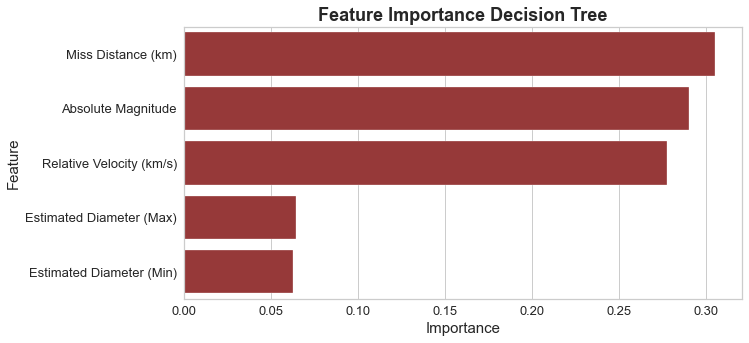

In [25]:
# Creating a Decision Tree Classifier.
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X, y) # Fit the model.

# Get feature importances,creating a DataFrame to store the feature importances and sort it in descending order.
importances = decision_tree.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot a bar chart to visualize the feature importances.
plt.figure(figsize=(10,5))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature',color='brown')
plt.title('Feature Importance Decision Tree', fontsize=18, fontweight='bold')
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

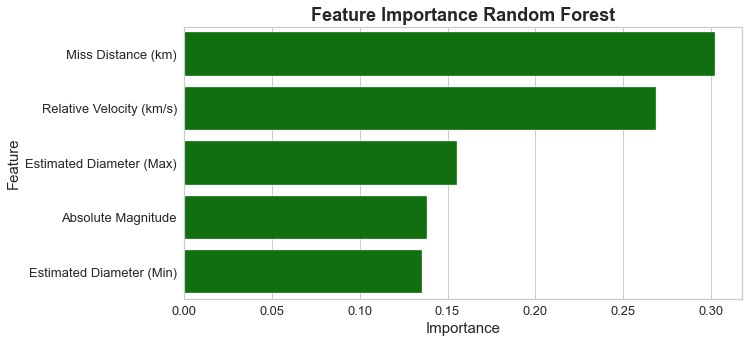

In [26]:
# Creating a Random Forest Classifier.
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X, y) # Fit the model.

# Get feature importances, creating a DataFrame to store the feature importances and sort it in descending order.
importances = random_forest.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot a bar chart to visualize the feature importances.
plt.figure(figsize=(10,5))
sns.barplot(data=importance_df.head(), x='Importance', y='Feature', color='green')
plt.title('Feature Importance Random Forest', fontsize=18, fontweight='bold')
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# 

### Adjusting the imbalance

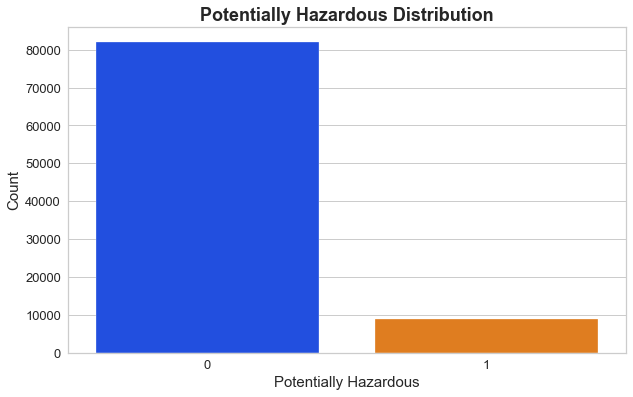

Number of Potentially Hazardous: 8840
Number of no Potentially Hazardous: 81996


In [27]:
# Create a count plot of "Potentially Hazardous".
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Potentially Hazardous")
plt.title("Potentially Hazardous Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Potentially Hazardous", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Print the number of positive and negative classes
print("Number of Potentially Hazardous:", df["Potentially Hazardous"].value_counts()[1])
print("Number of no Potentially Hazardous:", df["Potentially Hazardous"].value_counts()[0])
plt.show()

Number of Potentially Hazardous after Smottter: 8840
Number of no Potentially Hazardous after Smottem 81996


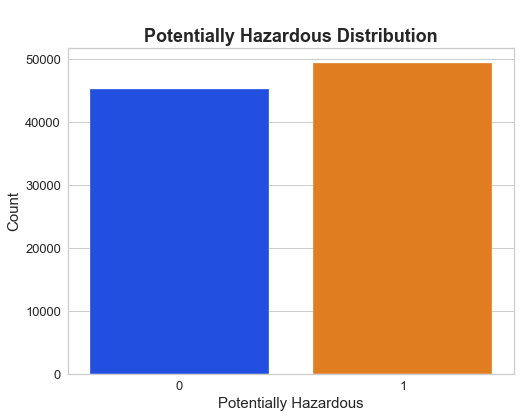

In [28]:
# Oversampling the train dataset using SMOTE + ENN.
smenn = SMOTEENN()
X_res, y_res = smenn.fit_resample(X, y)
print("Number of Potentially Hazardous after Smottter:", df["Potentially Hazardous"].value_counts()[1])
print("Number of no Potentially Hazardous after Smottem", df["Potentially Hazardous"].value_counts()[0])

# Plotting bar chart for y after SMOTEENN.
plt.figure(figsize=(8,6))
sns.countplot(y_res)
plt.title("\nPotentially Hazardous Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Potentially Hazardous", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# 

### Splitting the Data-Set into Training Set and Test Set

Total number of rows and columns for the complete dataset:  (94643, 5) (94643,)
X_train shape: (56785, 5)
y_train shape: (56785,)
X_val shape: (18929, 5)
y_val shape: (18929,)
X_test shape: (18929, 5)
y_test shape: (18929,)


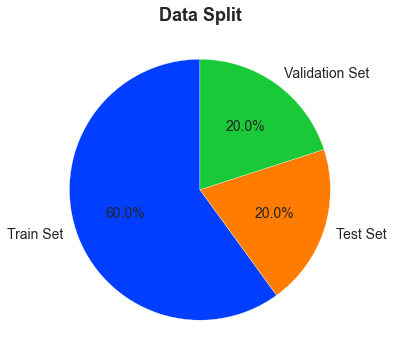

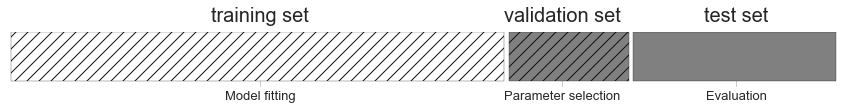

In [29]:
X = X_res # Independent variables
y = y_res # Dependent variables.                

# Split dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# Split training set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Print the shape of training, validation, and test.
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape)) 
print("y_val shape: {}".format(y_val.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))


# Define the sizes of the train, test, and validation sets.
train_size = len(X_train)
test_size = len(X_test)
val_size = len(X_val)
labels = ['Train Set', 'Test Set', 'Validation Set'] # Define the labels and sizes for the pie chart
sizes = [train_size, test_size, val_size]
plt.figure(figsize=(8,6)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}) # Create the pie chart.
plt.title('Data Split',fontsize=18, fontweight="bold") # Title.
plt.show()

# Illustration of train_test_split.
mglearn.plots.plot_threefold_split()

# 

### Normalization  the data

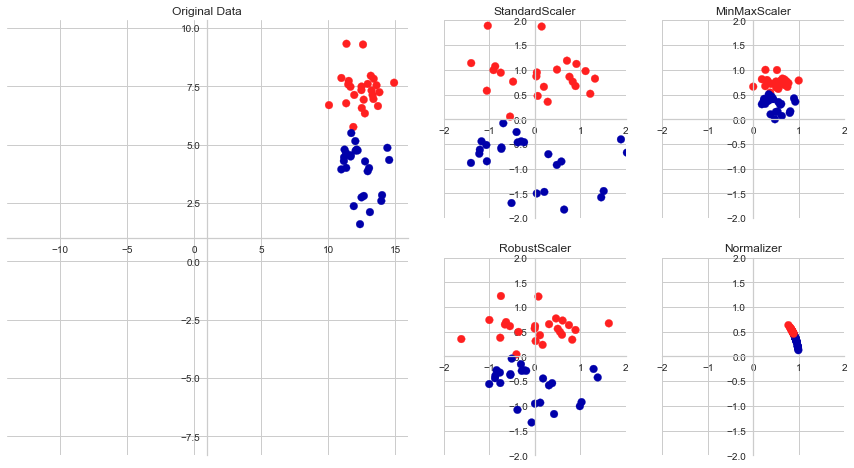

In [30]:
# Creating a MinMaxScaler() object.
scaler = MinMaxScaler()

# Scale the features in the training set using fit_transform().
X_train = scaler.fit_transform(X_train.astype(np.float))

# Scale the features in the validation set and test set using transform().
X_val = scaler.transform(X_val.astype(np.float))
X_test= scaler.transform(X_test.astype(np.float))

# Graphical representation of different scaling processes.
mglearn.plots.plot_scaling()

# 

### Machine Learning Models Comparison (X_train, y_train)

RF: 0.9416 (±0.0020) - Time: 83.54s
DT: 0.9220 (±0.0049) - Time: 2.73s
LR: 0.8870 (±0.0037) - Time: 0.47s
KNN: 0.9098 (±0.0033) - Time: 1.46s
NB: 0.8842 (±0.0035) - Time: 0.09s
LDA: 0.8854 (±0.0031) - Time: 0.53s
GB: 0.9171 (±0.0028) - Time: 74.34s
XGB: 0.9393 (±0.0020) - Time: 14.89s


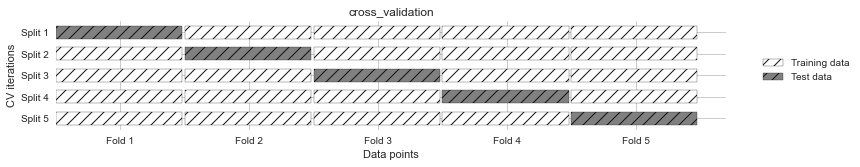

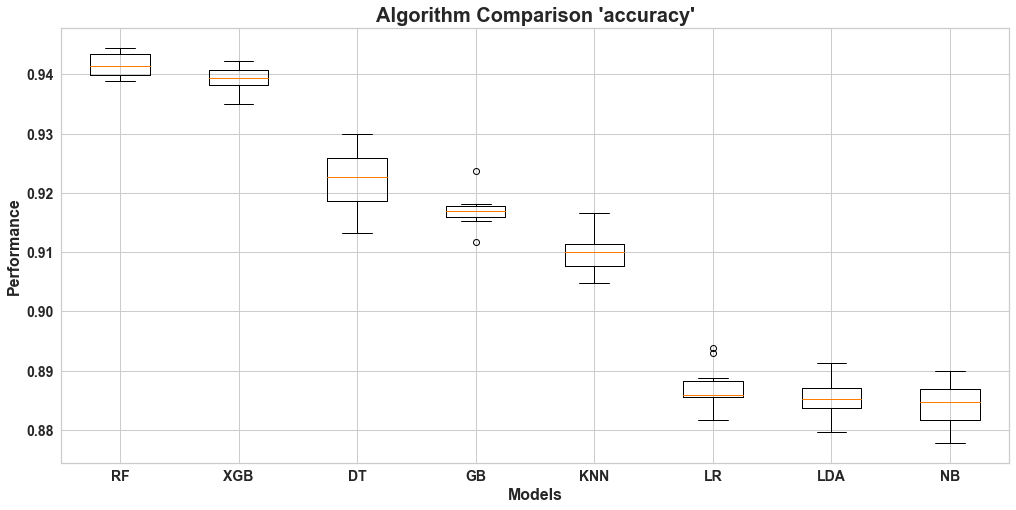

In [31]:
# Create a list of classifiers.
models = []
models.append(('RF', RandomForestClassifier(random_state=0)))
models.append(('DT', DecisionTreeClassifier(random_state=0)))
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GB', GradientBoostingClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))

# Informative of cross validation system.
mglearn.plots.plot_cross_validation()

# Running models with cross-validation on the training data.
results = []
names = []
times = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end_time = time.time()
    results.append(cv_scores)
    names.append(name)
    times.append(end_time - start_time)
    print(f'{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f}) - Time: {end_time - start_time:.2f}s')

# Sort results by descending performance.
idx = np.argsort([-np.mean(result) for result in results])
results_sorted = [results[i] for i in idx]
names_sorted = [names[i] for i in idx]

# Boxplot comparing resulting from the accuracies of models.
plt.figure(figsize=(17, 8))
pyplot.boxplot(results_sorted, labels=names_sorted)
plt.title("Algorithm Comparison 'accuracy'", fontweight="bold", fontsize=20)
plt.xlabel("Models", fontweight="bold", fontsize=16)
plt.ylabel("Performance", fontweight="bold", fontsize=16)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.show()

RF: 0.9253 (±0.0031) - Time: 83.57s
DT: 0.9249 (±0.0037) - Time: 2.72s
LR: 0.8509 (±0.0047) - Time: 0.44s
KNN: 0.8707 (±0.0042) - Time: 1.44s
NB: 0.8430 (±0.0054) - Time: 0.10s
LDA: 0.8287 (±0.0042) - Time: 0.52s
GB: 0.8717 (±0.0039) - Time: 73.64s
XGB: 0.9177 (±0.0029) - Time: 15.00s


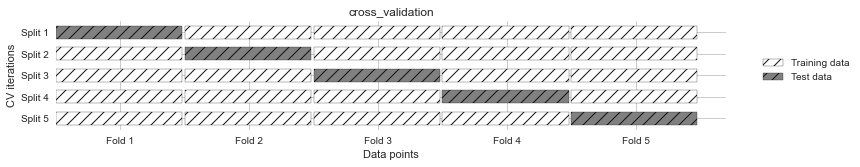

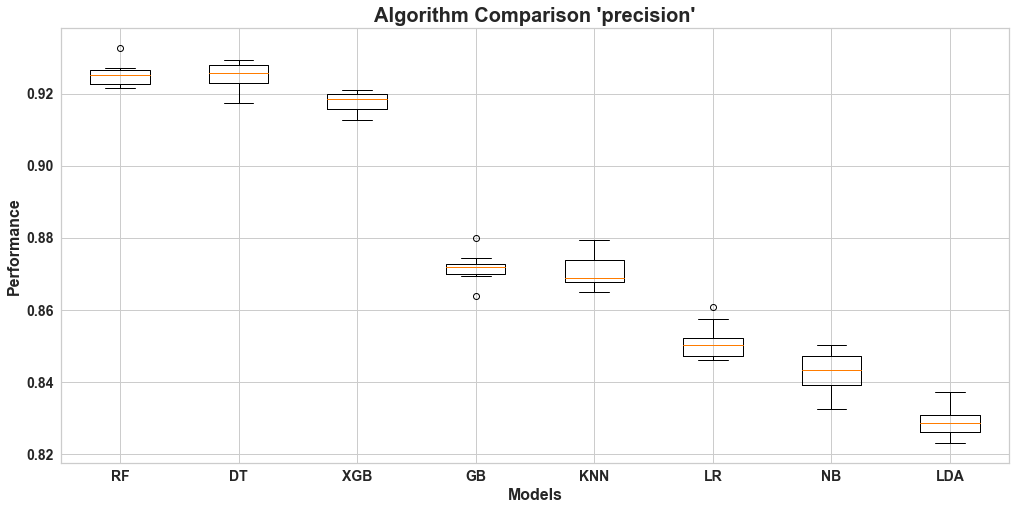

In [32]:
# Informative of cross validation system.
mglearn.plots.plot_cross_validation()

# Running models with cross-validation on the training data 
results = []
names = []
times = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    end_time = time.time()
    results.append(cv_scores)
    names.append(name)
    times.append(end_time - start_time)
    print(f'{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f}) - Time: {end_time - start_time:.2f}s')

# Sort results by descending performance.
idx = np.argsort([-np.mean(result) for result in results])
results_sorted = [results[i] for i in idx]
names_sorted = [names[i] for i in idx]   

# Boxplot comparing resulting from the accuracies of models
plt.figure(figsize=(17, 8))
pyplot.boxplot(results_sorted, labels=names_sorted)
plt.title("Algorithm Comparison 'precision'", fontweight="bold", fontsize=20)
plt.xlabel("Models", fontweight="bold", fontsize=16)
plt.ylabel("Performance", fontweight="bold", fontsize=16)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.show()

### Hyperparameter tuning comparison ( X_val_scaled, y_val)

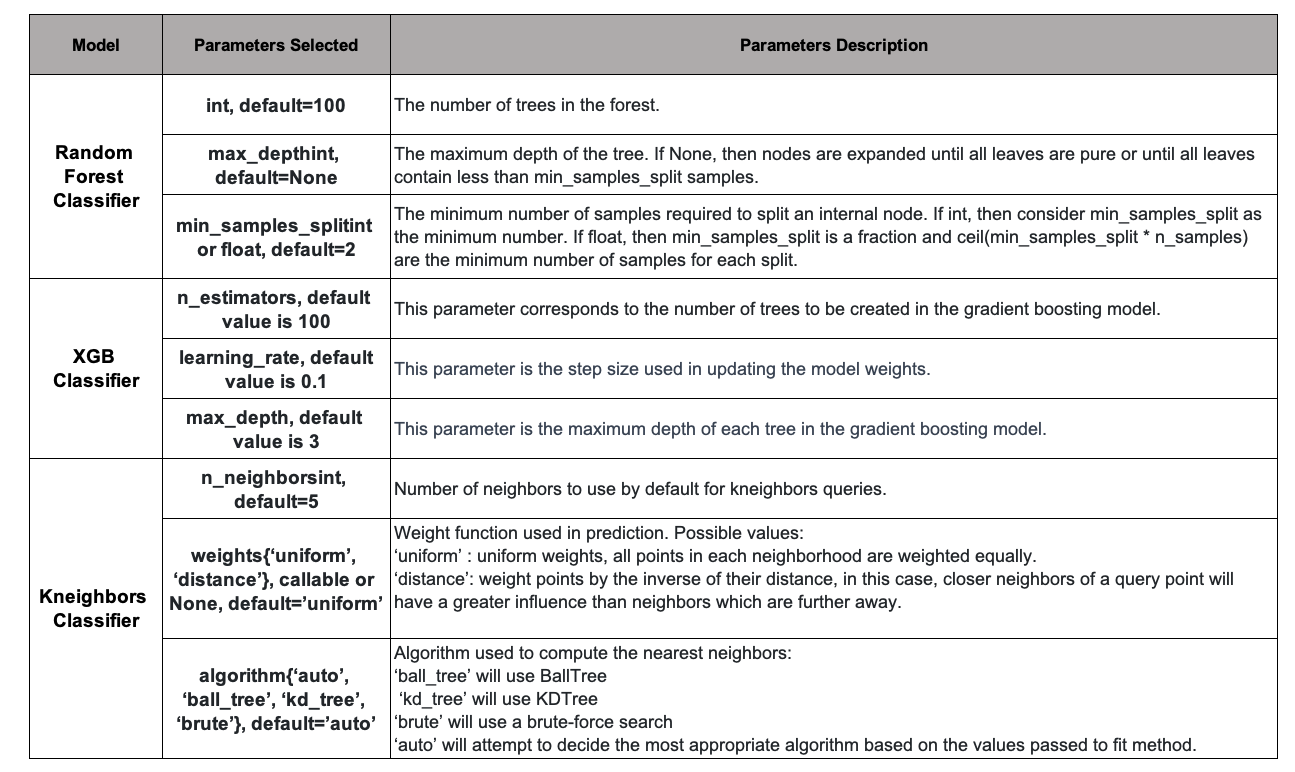

Running GridSearchCV for RF
Best parameters for RF: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 80}
Validation accuracy for RF: 0.932
Test accuracy for RF: 0.929


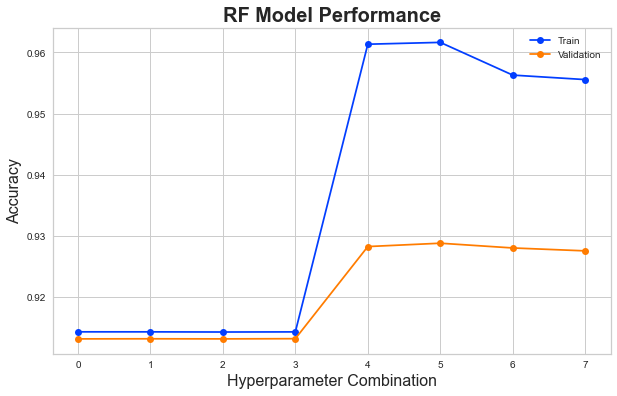

Running GridSearchCV for XGB
Best parameters for XGB: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 150}
Validation accuracy for XGB: 0.952
Test accuracy for XGB: 0.949


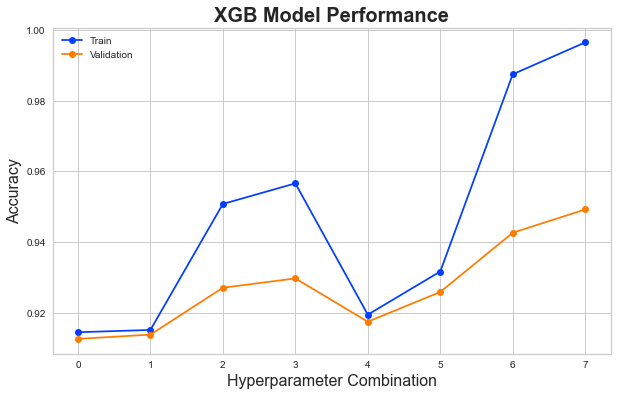

Running GridSearchCV for KNN
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Validation accuracy for KNN: 0.920
Test accuracy for KNN: 0.916


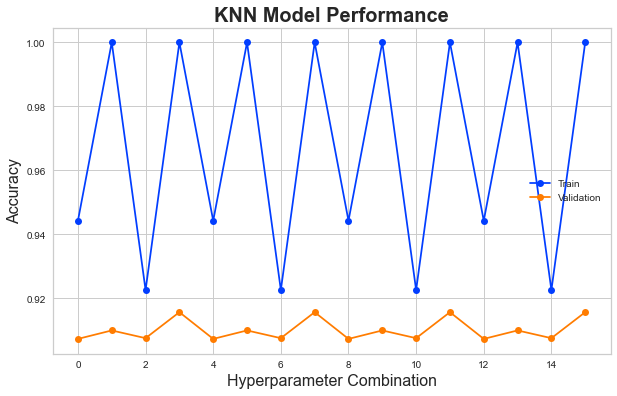

In [33]:
# Set up the parameter grids for each model.
param_grid_rf = {
    'n_estimators': [20, 80],
    'max_depth': [5, 20],
    'min_samples_split': [2, 5]
}
param_grid_xgb = {
    'n_estimators': [70, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 20]
}
param_grid_knn = {
    'n_neighbors': [3, 8],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a list of models and parameter grids.
models = []
models.append(('RF', RandomForestClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
param_grids = []
param_grids.append(param_grid_rf)
param_grids.append(param_grid_xgb)
param_grids.append(param_grid_knn)

# Run grid search on each model.
for i, (name, model) in enumerate(models):
    print(f"Running GridSearchCV for {name}")
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=0)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[i], cv=inner_cv, return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    val_acc = best_model.score(X_val, y_val)
    print(f"Best parameters for {name}: {grid_search.best_params_}") # What is the set of hyperparameters that provide the best final result.
    print(f"Validation accuracy for {name}: {val_acc:.3f}") # The accuracy of the model in the validation set with the best selected hyperparameters.
    
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(best_model, X_train, y_train, cv=outer_cv)
    print(f"Test accuracy for {name}: {scores.mean():.3f}") # The accuracy of the model on an independent test set, which is important for assessing the generalizability of the model.
    
    # Create a list of scores for each hyperparameter combination.
    scores_train = list(grid_search.cv_results_['mean_train_score'])
    scores_val = list(grid_search.cv_results_['mean_test_score'])

    # Plot the training and validation scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(scores_train)), scores_train, '-o', label='Train')
    plt.plot(range(len(scores_val)), scores_val, '-o', label='Validation')
    plt.title(f'{name} Model Performance',fontweight="bold", fontsize=20)
    plt.xlabel('Hyperparameter Combination',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.legend()
    plt.show()

Running GridSearchCV for RF
Best parameters for RF: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 80}
Validation precision for RF: 0.932
Test precision for RF: 0.936


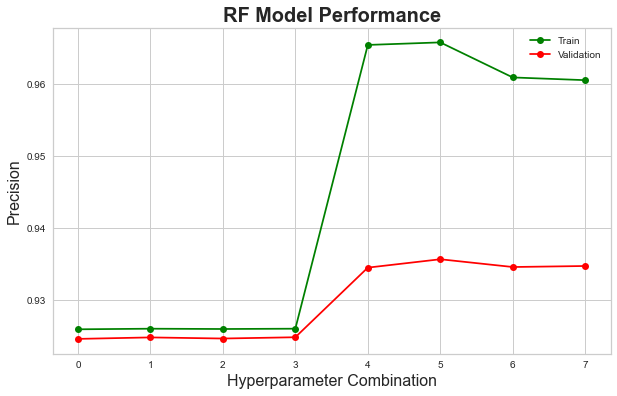

Running GridSearchCV for XGB
Best parameters for XGB: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 150}
Validation precision for XGB: 0.952
Test precision for XGB: 0.951


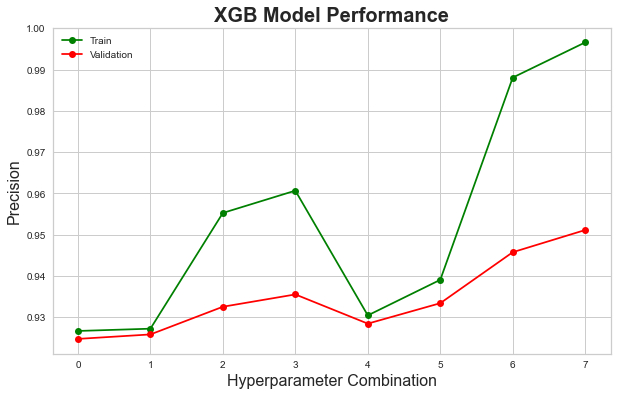

Running GridSearchCV for KNN
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Validation precision for KNN: 0.920
Test precision for KNN: 0.925


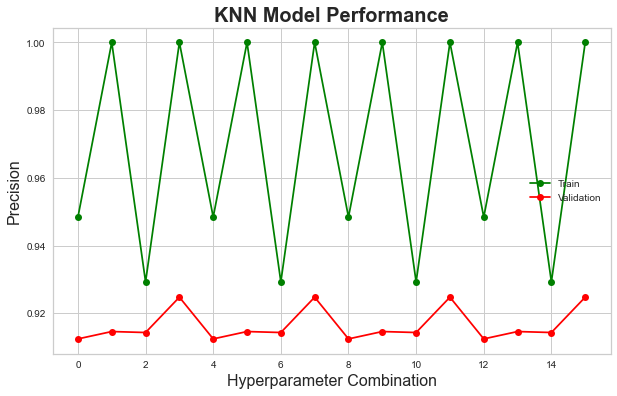

In [34]:
# Run grid search on each model.
for i, (name, model) in enumerate(models):
    print(f"Running GridSearchCV for {name}")
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=0)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[i], cv=inner_cv, return_train_score=True, scoring='precision_macro')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    val_acc = best_model.score(X_val, y_val)    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Validation precision for {name}: {val_acc:.3f}")
    
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(best_model, X_train, y_train, cv=outer_cv, scoring='precision_macro')
    print(f"Test precision for {name}: {scores.mean():.3f}")
    
    # Create a list of scores for each hyperparameter combination.
    scores_train = list(grid_search.cv_results_['mean_train_score'])
    scores_val = list(grid_search.cv_results_['mean_test_score'])
    
    # Plot the training and validation scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(scores_train)), scores_train, '-o', label='Train', color='green')
    plt.plot(range(len(scores_val)), scores_val, '-o', label='Validation', color='red')
    plt.title(f'{name} Model Performance',fontweight="bold", fontsize=20)
    plt.xlabel('Hyperparameter Combination',fontsize=16)
    plt.ylabel('Precision',fontsize=16)
    plt.legend()
    plt.show()

# 

### Model Evaluation (X_test, y_test)



Evaluating RF


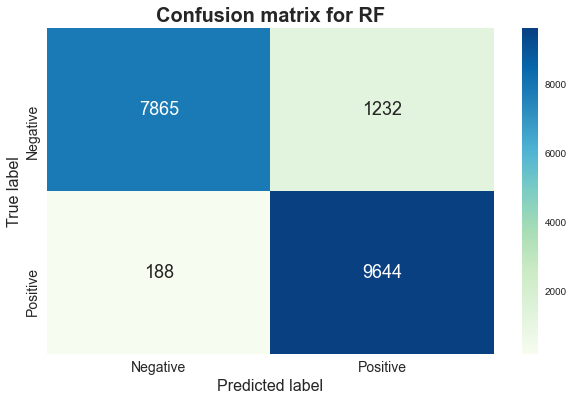

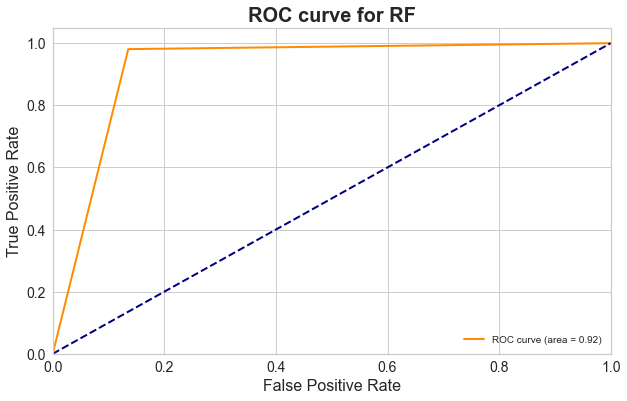

ROC curve (area = 0.92)


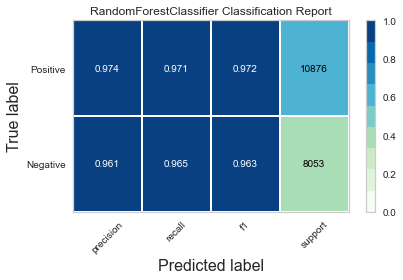

Kappa score for RF: 0.85


Evaluating XGB


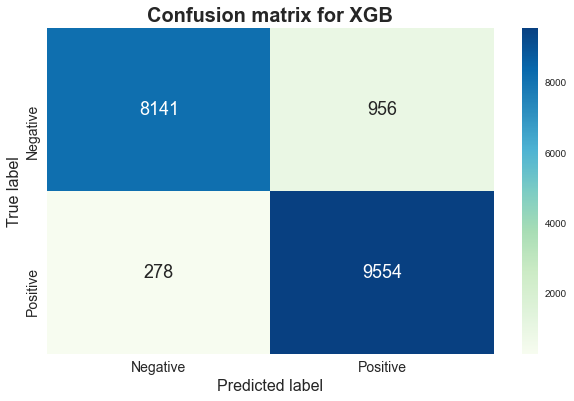

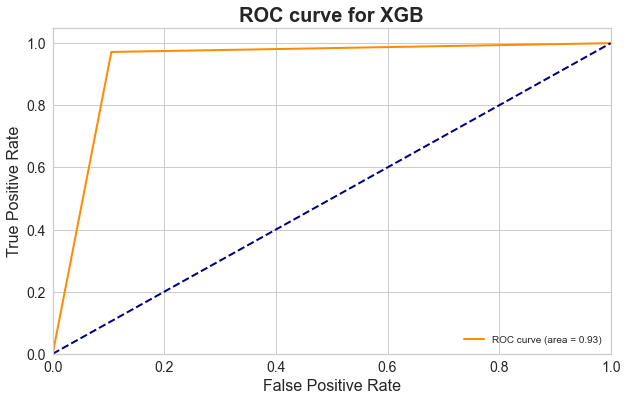

ROC curve (area = 0.93)


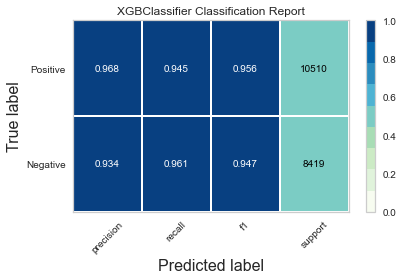

Kappa score for XGB: 0.87


Evaluating KNN


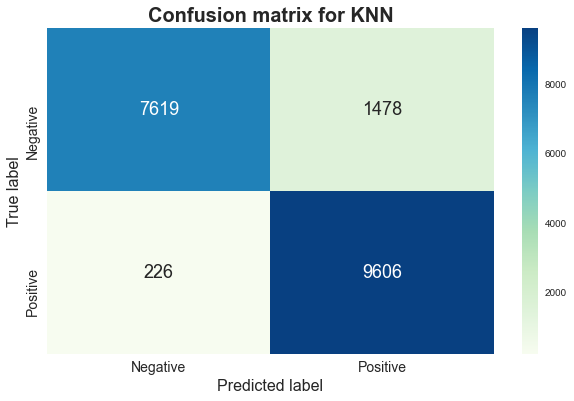

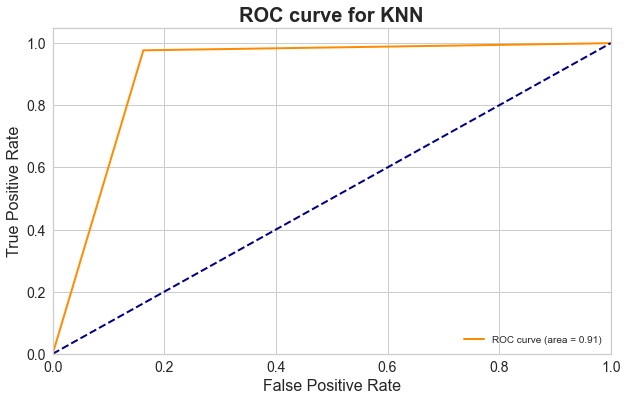

ROC curve (area = 0.91)


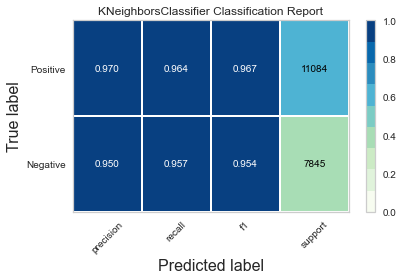

Kappa score for KNN: 0.82


In [36]:
# Define the models.
models = []
models.append(('RF', RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=80,random_state=0)))
models.append(('XGB', XGBClassifier(learning_rate=0.1, max_depth=20, n_estimators=150,random_state=0)))
models.append(('KNN', KNeighborsClassifier(weights='distance', n_neighbors=8, algorithm='auto')))

# Evaluate each model using cross-validation.
for name, model in models:
    print(f"\n\n\033[1mEvaluating {name}\033[0m")
    y_pred = cross_val_predict(model, X_test, y_test, cv=10)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc_score = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
     
    # Display confusion matrix.
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='GnBu',xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], annot_kws={"fontsize":18})
    plt.title(f"Confusion matrix for {name}",fontweight="bold", fontsize=20)
    plt.xlabel("Predicted label",fontsize=16)
    plt.ylabel("True label",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    
    # Display ROC curve.
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title(f"ROC curve for {name}",fontweight="bold", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="lower right")
    plt.show()
    
    # Print AUC score.
    print(f"ROC curve (area = {roc_auc:.2f})")
    
    # Display classification report.
    cm_viz = ClassificationReport(model, support=True, cmap='GnBu', annot_kws={"fontsize":16}, classes=["Negative", "Positive"], figsize=(10, 8))
    cm_viz.ax.set_title(f"Classification Report {name}", fontsize=20, fontweight='bold')
    cm_viz.ax.set_xlabel("Predicted label", fontsize=16)
    cm_viz.ax.set_ylabel("True label", fontsize=16)  
    cm_viz.fit(X_train, y_train)
    cm_viz.score(X_test, y_pred)
    cm_viz.show()   
    
    # Print Kappa score.
    print(f"Kappa score for {name}: {kappa:.2f}")